In [11]:
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from ibllib.qc.camera import CameraQC
from iblatlas.atlas import AllenAtlas

In [2]:
mode = 'local'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

In [3]:
# Note: remote queries *sometimes* need full dataset name?
# Note: dataset kwarg can be list, but only for local queries
# eids = one.search(project=['psychedelics'], datasets=['spikes.times.npy', '_iblrig_leftCamera.raw.mp4'], query_type='remote')
# print(len(eids))

In [4]:
eids_all = one.search(project='psychedelics')
print(f'Psychedelics sessions: {len(eids_all)}')

Psychedelics sessions: 74


In [5]:
eids_vid = one.search(project='psychedelics', dataset=['Camera'])
print(f'Psychedelics sessions with video: {len(eids_vid)}')

Psychedelics sessions with video: 59


In [6]:
eids_ephys = one.search(project='psychedelics', dataset=['ephys'])
print(f'Psychedelics sessions with ephys: {len(eids_ephys)}')

Psychedelics sessions with ephys: 29


In [7]:
eids_spikes = one.search(project='psychedelics', dataset=['spikes'])
print(f'Psychedelics sessions with spike sorting: {len(eids_spikes)}')

Psychedelics sessions with spike sorting: 28


In [8]:
# Note: NotImplementedError: Searching on insertions required remote connection
pids_spikes = one.search_insertions(project='psychedelics', dataset='spikes', query_type='remote')
print(f'Psychedelics probes with spike sorting: {len(pids_spikes)}')

Psychedelics probes with spike sorting: 48


In [10]:
one.mode = 'remote'
n_probes = np.full(len(eids_spikes), np.nan)
for i, eid in enumerate(eids_spikes):
    info = one.load_dataset(eid, '_ibl_experiment.description.yaml')
    n_probes[i] = len(info['devices']['neuropixel'])
print(f'Sessions with two probes: {(n_probes == 2).sum()}')

Sessions with two probes: 23


In [11]:
eids = one.search(project='psychedelics', dataset=['spikes', 'Camera'], query_type='local')
print(f'Psychedelics sessions with spike sorting & video: {len(eids)}')

Psychedelics sessions with spike sorting & video: 28


In [12]:
eid = eids[0]
pprint(one.list_datasets(eid))
print(f'All datasets for session: {eid}')

All datasets for session: d77dd225-f7a9-4d01-996b-82c3ae73d56c
['_ibl_experiment.description.yaml',
 'alf/_ibl_bodyCamera.dlc.pqt',
 'alf/_ibl_bodyCamera.times.npy',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/bodyCamera.ROIMotionEnergy.npy',
 'alf/bodyROIMotionEnergy.position.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/probe00/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe00/electrodeSites.localCoordinates.npy',
 'alf/probe00/electrodeSites.mlapdv.npy',
 'alf/probe00/pykilosort/_ibl_log.info_pykilosort.log',
 'alf/probe00/pykilosort/_kilosort_whitening.matrix.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.channels.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.spikes.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.waveforms.npy',
 'alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy',
 'alf/probe00/pykilosort/chan

In [13]:
# Get overall timings for stimulation protocols
one.mode = 'remote'

# ALFObjectNotFound: trials 
# loader = SessionLoader(eid=eid, one=one)
# loader.load_trials()

['alf/task_00/_ibl_passiveGabor.table.csv',
'alf/task_00/_ibl_passivePeriods.intervalsTable.csv',
'alf/task_00/_ibl_passiveRFM.times.npy',
'alf/task_00/_ibl_passiveStims.table.csv']

first = one.load_dataset(eid, 'alf/task_00/_ibl_passivePeriods.intervalsTable.csv')
second = one.load_dataset(eid, 'alf/task_01/_ibl_passivePeriods.intervalsTable.csv')

print(first)
print(second)

(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/task_00/_ibl_passivePeriods.intervalsTable.csv: 100%|██████████| 207/207 [00:00<00:00, 586B/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/task_01/_ibl_passivePeriods.intervalsTable.csv: 100%|██████████| 209/209 [00:00<00:00, 585B/s]

  Unnamed: 0  passiveProtocol  spontaneousActivity         RFM   taskReplay
0      start        40.189634            52.456301  364.755134   678.087198
1       stop      3029.724119           352.488467  665.820531  3029.724119
  Unnamed: 0  passiveProtocol  spontaneousActivity          RFM   taskReplay
0      start      3038.170606          3050.437273  3362.753138  3676.101400
1       stop      4042.941732          3350.486471  3663.834733  4042.941732


In [14]:
# Get specific trial timing for trials (needed because task_00 keeps running even though no stimuli are presented)
one.mode = 'remote'

# ALFObjectNotFound: trials 
# loader = SessionLoader(eid=eid, one=one)
# loader.load_trials()

['alf/task_00/_ibl_passiveGabor.table.csv',
'alf/task_00/_ibl_passivePeriods.intervalsTable.csv',
'alf/task_00/_ibl_passiveRFM.times.npy',
'alf/task_00/_ibl_passiveStims.table.csv']

one.load_dataset(eid, 'alf/task_00/_ibl_passiveGabor.table.csv')

(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/task_00/_ibl_passiveGabor.table.csv: 100%|██████████| 12.4k/12.4k [00:00<00:00, 40.2kB/s]


,Unnamed: 0,start,stop,position,contrast,phase
0,0,682.515575,682.771049,-35.0,0.250,2.727673
1,1,687.535640,687.852941,35.0,0.000,0.667190
2,2,689.268900,689.569803,35.0,0.000,3.019945
3,3,690.768916,691.085751,35.0,0.000,2.401130
4,4,691.835476,692.136279,-35.0,0.250,0.827183
...,...,...,...,...,...,...
175,175,984.568633,984.886035,-35.0,0.125,2.918050
176,176,986.001890,986.318792,-35.0,0.250,2.549127
177,177,987.768480,988.102613,35.0,0.125,1.696819
178,178,989.768447,990.085682,-35.0,0.000,1.087737


In [15]:
# Get administration time in seconds
df_infos = pd.read_csv('recordings.csv')
df_infos['date'] = df_infos['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y').date())
df_infos['administration_time'] = df_infos['administration_time'].apply(lambda x: np.sum(np.array([int(val) for val in x.split(':')]) * np.array([3600, 60, 1])))

eid_info = one.get_details(eid)
subject = eid_info['subject']
date = eid_info['date']

admin_time = df_infos[(df_infos['animal_ID'] == subject) & (df_infos['date'] == date)]['administration_time']

In [16]:
def sessions_with_datasets(eids, datasets):
    eids_with_datasets = {}
    print('Proportion of sessions with')
    for name, dataset in datasets.items():
        has_dataset = [dataset in one.list_datasets(eid) for eid in eids]
        n = np.array(has_dataset).sum()
        prop = np.array(has_dataset).mean()
        print(f'    {name}: {prop:.2f} ({n}/{len(eids)})')
        eids_with_datasets[name] = np.array(eids)[has_dataset]
    return eids_with_datasets

In [17]:
one.mode = 'local'
datasets  = {
    'left_camera':  'raw_video_data/_iblrig_leftCamera.raw.mp4',
    'right_camera': 'raw_video_data/_iblrig_rightCamera.raw.mp4',
    'body_camera':  'raw_video_data/_iblrig_bodyCamera.raw.mp4'
}
eids_vid = sessions_with_datasets(eids, datasets)

Proportion of sessions with
    left_camera: 1.00 (28/28)
    right_camera: 1.00 (28/28)
    body_camera: 1.00 (28/28)


In [18]:
datasets  = {
    'left_ME':  'alf/leftCamera.ROIMotionEnergy.npy',
    'right_ME': 'alf/rightCamera.ROIMotionEnergy.npy',
    'body_ME':  'alf/bodyCamera.ROIMotionEnergy.npy'
}
eids_ME = sessions_with_datasets(eids, datasets)

Proportion of sessions with


    left_ME: 0.96 (27/28)
    right_ME: 0.96 (27/28)
    body_ME: 0.96 (27/28)


In [19]:
datasets  = {
    'left_DLC':  'alf/_ibl_leftCamera.dlc.pqt',
    'right_DLC': 'alf/_ibl_rightCamera.dlc.pqt',
    'body_DLC':  'alf/_ibl_bodyCamera.dlc.pqt'
}
eids_DLC = sessions_with_datasets(eids, datasets)

Proportion of sessions with
    left_DLC: 0.96 (27/28)
    right_DLC: 0.96 (27/28)
    body_DLC: 0.96 (27/28)


In [20]:
eid_missing_data = np.setdiff1d(eids_vid['left_camera'], eids_ME['left_ME'])[0]
print('Session with missing 
one.eid2ref(eid_vid_missing)

SyntaxError: unterminated string literal (detected at line 2) (2752337143.py, line 2)

In [21]:
qc = CameraQC(one.eid2path(eids[0]), 'left', one=one)
outcome, extended = qc.run()
print(f'video QC = {outcome}')
extended

2024-11-19 16:52:27 INFO     camera.py:399  Computing QC outcome for left camera, session d77dd225-f7a9-4d01-996b-82c3ae73d56c
2024-11-19 16:52:27 INFO     camera.py:203  Gathering data for QC


FileNotFoundError: No ephys files found in /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001

In [22]:
one.mode = 'remote'
video_body = one.load_dataset(eids[0], '_iblrig_leftCamera.raw.mp4', collection='raw_video_data')

100%|██████████| 15/15.0 [00:12<00:00,  1.15it/s]


In [23]:
eid

'd77dd225-f7a9-4d01-996b-82c3ae73d56c'

In [24]:
one.mode = 'remote'
loader = SessionLoader(eid=eids[1], one=one)
loader.load_pose()

(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_bodyCamera.times.npy: 100%|██████████| 13.6M/13.6M [00:06<00:00, 2.18MB/s]


In [25]:
dx = np.diff(loader.pose['leftCamera']['nose_tip_x'])
dy = np.diff(loader.pose['leftCamera']['nose_tip_y'])

In [43]:
movement = np.sqrt(dx ** 2 + dy ** 2)

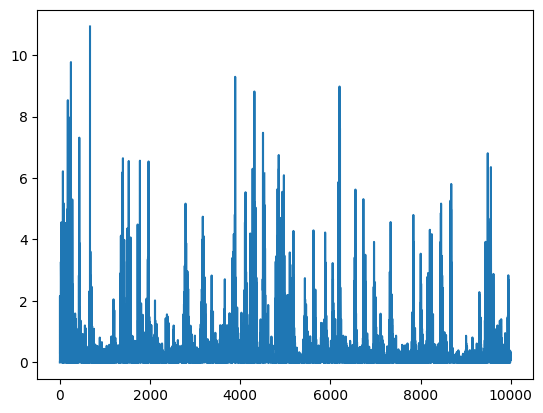

In [47]:
from matplotlib import pyplot as plt
plt.plot(movement[:10000])

In [31]:
one.load_dataset(eids[0], 'alf/bodyCamera.ROIMotionEnergy.npy')

array([5.17430735, 1.36335754, 1.25472152, ..., 0.26682809, 0.41113803,
       0.41113803])

In [26]:
import logging
logging.basicConfig(filename='fetch.log', level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Download motion energy (and camera tpts)
one.mode = 'auto'
for eid in eids:
    logger.info(f'\nSESSION: {eid}')
    loader = SessionLoader(eid=eid, one=one)
    try:
        loader.load_motion_energy()
    except KeyError as exception:
        logger.exception(f'Error loading motion energy for session {eid}: {exception}')

(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/leftCamera.ROIMotionEnergy.npy: 100%|██████████| 1.92M/1.92M [00:02<00:00, 742kB/s] 
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/_ibl_leftCamera.times.npy: 100%|██████████| 1.92M/1.92M [00:01<00:00, 1.09MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/_ibl_rightCamera.times.npy: 100%|██████████| 4.82M/4.82M [00:03<00:00, 1.25MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/rightCamera.ROIMotionEnergy.npy: 100%|██████████| 4.82M/4.82M [00:01<00:00, 3.05MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/bodyCamera.ROIMotionEnergy.npy: 100%|██████████| 13.5M/13.5M [00:06<00:00, 2.23MB/s]
(S3) /home/openlab/Down

In [27]:
import pandas as pd
pd.read_csv('recordings.csv')

,rec_day,date,animal_ID,weight,stock_uL,saline_uL,administration_method,administration_time,alyx_registration
0,1,07.12.2022,ZFM-05486,28.8,86.4,113.6,Catheter,0:20:00,Error
1,1,08.12.2022,ZFM-05496,23.1,69.3,130.7,Catheter,0:18:15,Completed
2,2,15.12.2022,ZFM-05486,29.3,87.9,112.1,Catheter,0:19:33,Completed
3,2,15.12.2022,ZFM-05496,23.6,70.8,129.2,Catheter,0:18:20,Error
4,1,24.01.2023,ZFM-05725,27.2,81.6,118.4,Catheter,0:20:21,Completed
5,1,25.01.2023,ZFM-05727,27.3,81.9,118.1,Catheter,0:17:11,Completed
6,2,31.01.2023,ZFM-05725,27.3,81.9,118.1,Catheter,0:17:43,Completed
7,2,01.02.2023,ZFM-05727,27.4,82.2,117.9,Catheter,0:17:48,Completed
8,3,07.02.2023,ZFM-05725,28.2,84.6,115.4,Catheter,0:18:08,Completed
9,3,08.02.2023,ZFM-05727,27.5,82.5,117.5,Catheter,0:17:45,Completed


In [28]:
one.mode = 'remote'
pids = np.concatenate([one.eid2pid(eid)[0] for eid in eids])

In [ ]:
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=AllenAtlas(res_um=10))
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

In [85]:
AllenAtlas?

Init signature: AllenAtlas(res_um=25, scaling=(1, 1, 1), mock=False, hist_path=None)
Docstring:     
The Allan Common Coordinate Framework (CCF) brain atlas.

Instantiates an atlas.BrainAtlas corresponding to the Allen CCF at the given resolution
using the IBL Bregma and coordinate system.
Init docstring:
Instantiates an atlas.BrainAtlas corresponding to the Allen CCF at the given resolution
using the IBL Bregma and coordinate system.

Parameters
----------
res_um : {10, 25, 50} int
    The Atlas resolution in micrometres; one of 10, 25 or 50um.
scaling : float, numpy.array
    Scale factor along ml, ap, dv for squeeze and stretch (default: [1, 1, 1]).
mock : bool
    For testing purposes, return atlas object with image comprising zeros.
hist_path : str, pathlib.Path
    The location of the image volume. May be a full file path or a directory.

Examples
--------
Instantiate Atlas from a non-default location, in this case the cache_dir of an ONE instance.
>>> target_dir = one.cache_dir 

(['b0b6a756-8b8a-4cee-9f4f-da0daab9790d',
  'a4d69060-1834-4c71-87fe-24eec1988bce'],
 ['probe00', 'probe01'])

In [ ]:
EphysSessionLoader